# Тестирование инварианта для обратного преобразования Фурье, частоты в радианах.

$\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{ix\xi}f(x)dx$,

инвариант: $f(\xi) = e^{-\frac{\xi^2}{2}}$, константа: $\sqrt{2\pi}$

Обоснование:

Преобразование Фурье вида $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{ix\xi}f(x)dx$, действуя на $f(x) = e^{-\frac{\xi^2}{2}}$, принимает вид

$\hat{f(\xi)} = 
\int_{-\infty}^{\infty}e^{ix\xi} e^{-\frac{x^2}{2}}dx = 
\int_{-\infty}^{\infty}e^{ix\xi -\frac{x^2}{2}}dx = 
\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}})^2 + ix\xi - (\frac{i\xi}{\sqrt{2}})^2 + (\frac{i\xi}{\sqrt{2}})^2}dx = 
\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}} - \frac{i\xi}{\sqrt{2}})^2 - (\frac{\xi}{\sqrt{2}})^2}dx = 
e^{-(\frac{\xi}{\sqrt{2}})^2}\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}} - \frac{i\xi}{\sqrt{2}})^2}dx =
\color{blue}{// t = \frac{x}{\sqrt{2}} - \frac{i\xi}{\sqrt{2}}, dt = \frac{1}{\sqrt{2}}dx//}=
e^{-\frac{\xi^2}{2}} \cdot \sqrt{2\pi}$

Библиотечное преобразование имеет неизменный вид $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-2\pi ix\xi}f(x)dx$

То, которое нас интересует - $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-ix\xi}f(x)dx$.

Для того, чтобы их связать, используем явный вывод для связи дискретных формул.

$$  a_k = \frac{1}{M}\sum_{l=0}^{M-1}A_l\exp\left\{2\pi i{kl\over M}\right\} \qquad k = 0,\ldots,M-1.$$

$a_k =$

In [13]:
import numpy as np
from numpy import fft, pi, sqrt
from scipy import integrate
from matplotlib import pyplot as plt

def make_rad_ifft(f_hat_xi, d):
    '''
    Вычисляет обратное преобразование Фурье без двух "пи" в показателе экспоненты
    
    Параметры:
    
    f_xi - массив значений функции, задаваемый "как есть", без особенностей хранения
    и определённый на диапазоне [-pi/d, pi/d] в M = 2**N равноудалённых точках, без последней.
    
    d = dx - желаемый шаг по переменной x, после того, как ifft отработает
    
    Области определения:
    
    xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
    x_space = np.linspace( -M*dx/2, M*dx/2, num = M, endpoint = False)

    '''
    dx = d
    M = len(f_hat_xi)

    sign_change_k = np.array([(-1)**k for k in range(0, M)])
    sign_change_l = np.array([(-1)**l for l in range(0, M)])

    f =  (M/(dx)) * sign_change_k * fft.ifft(fft.ifftshift(sign_change_l * f_hat_xi))
    return f

#old
# def make_rad_ifft(f_hat_xi, d):
#     '''
#     Вычисляет обратное преобразование Фурье без двух "пи" в показателе экспоненты
    
#     Параметры:
    
#     f_xi - массив значений функции, задаваемый "как есть", без особенностей хранения
#     и определённый на диапазоне [-pi/d, pi/d] в M = 2**N равноудалённых точках, без последней.
    
#     d = dx - желаемый шаг по переменной x, после того, как ifft отработает
    
#     Области определения:
    
#     xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
#     x_space = np.linspace( -M*dx/2, M*dx/2, num = M, endpoint = False)

#     '''
#     dx = d
#     M = len(f_hat_xi)
    

#     sign_change_k = np.array([(-1)**k for k in range(0, M)])        
#     sign_change_l = np.array([(-1)**l for l in range(0, M)])

#     f =  1/np.sqrt(2*np.pi) * ((2*pi)/(dx)) * sign_change_k * fft.ifft(sign_change_l * f_hat_xi)
#     return f

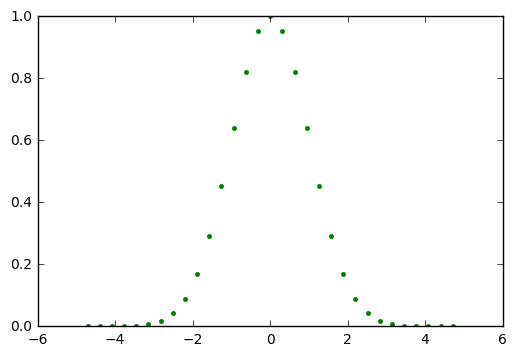

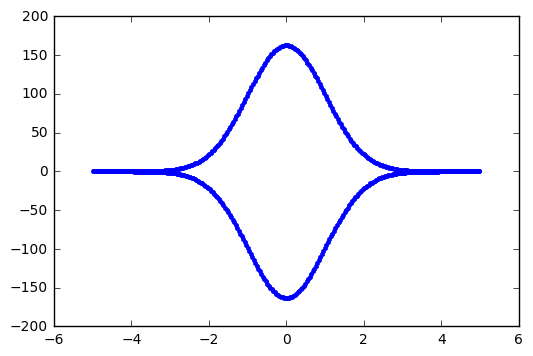

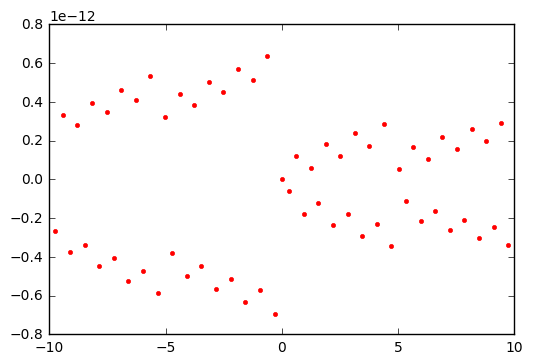

In [14]:
M = 2**10
dx = 20 / M

x_space = np.linspace( -M*dx/2, M*dx/2, num = M, endpoint = False)
xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)

#инвариант для преобразований без двух пи
f0 = np.exp(-(xi_space * xi_space)/2)

plt.plot(xi_space[(xi_space>-5) & (xi_space<5)], f0[(xi_space>-5) & (xi_space<5)], 'g.')
plt.show()

f1 = 1/np.sqrt(2*np.pi) * make_rad_ifft(f0, dx)

# Рисуем только те же значения xi, для которых мы определяли функцию по x, 
# чтобы сравнение картинок получилось наглядным
# Мы не использовали сдвиг ответа, но это то, что нужно сделать, если потом нужно применять не ifft

plt.plot(x_space[(x_space>-5) & (x_space<5)], f1.real[(x_space>-5) & (x_space<5)], 'b.')
plt.show()

# мнимая часть мала, но есть. Можно раскомментировать, чтобы на неё посмотреть.
plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f1.imag[(xi_space>-10) & (xi_space<10)], 'r.')
plt.show()